# Primeira atividade prática - Curso Data Science

#### Importando as bibliotecas:

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Definindo o diretório:

In [2]:
os.chdir("/home/usuario/Documentos/curso_python")

#### Abrindo o data ser e definindo as colunas:

In [3]:
Felicidade_2017=pd.read_csv("world-happiness_2017.csv")
Felicidade_2017.columns=['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.',
                         'Family','Health..Life.Expectancy.','Freedom','Generosity','Trust..Government.Corruption.']

#### Definindo uma função para gerar um array

In [5]:
def geraArray(lst):
    a=len(lst)
    x=[]
    for i in range(a):
        x.append(lst[i])
    x=np.array(x)
    return x

#### perguntando para o usuário qual índice será usado para gerar um array:

In [6]:
teste=0

while(teste==0):
    indice = input("Digite o indice (entre aspas) que deseja armazenar em um array: ")
    a=len(Felicidade_2017.columns)

    for i in range(a):
        if str(indice) in Felicidade_2017.columns[i]:
            teste=1
    if teste == 0:
        print("não é um índice válido! Digite novamente")
    
    

Digite o indice (entre aspas) que deseja armazenar em um array: 'Happiness.Score'


In [7]:
array=geraArray(Felicidade_2017[indice])
print array

[7.53700018 7.52199984 7.50400019 7.49399996 7.46899986 7.37699986
 7.31599998 7.31400013 7.28399992 7.28399992 7.21299982 7.079
 7.00600004 6.99300003 6.97700024 6.95100021 6.89099979 6.86299992
 6.71400023 6.65199995 6.64799976 6.63500023 6.60900021 6.59899998
 6.57800007 6.57200003 6.52699995 6.454      6.454      6.45200014
 6.44199991 6.42399979 6.42199993 6.40299988 6.375      6.35699987
 6.34399986 6.16800022 6.10500002 6.09800005 6.08699989 6.08400011
 6.0710001  6.0079999  6.00299978 5.97300005 5.97100019 5.96400023
 5.96299982 5.95599985 5.92000008 5.90199995 5.87200022 5.8499999
 5.83799982 5.83799982 5.82499981 5.82299995 5.82200003 5.81899977
 5.80999994 5.7579999  5.71500015 5.62900019 5.62099981 5.61100006
 5.56899977 5.5250001  5.5        5.49300003 5.47200012 5.42999983
 5.39499998 5.33599997 5.32399988 5.31099987 5.29300022 5.27899981
 5.27299976 5.26900005 5.26200008 5.25       5.23699999 5.23500013
 5.23400021 5.23000002 5.22700024 5.2249999  5.19500017 5.18200016
 

#### Plotando o histograma:

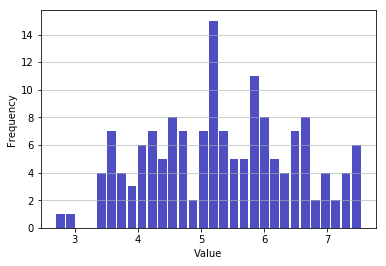

In [8]:
plt.hist(array,bins=30,color='#0504aa',alpha=0.7, rwidth=0.85)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [9]:
np.average(array) #média

5.354019355772258

#### Definindo uma função para identificar determinados parâmetros para o país Brasil:

In [10]:
def buscapais(pais,lista):
    paises=lista['Country']
    a=len(paises)
    
    for i in range(a):
        b=paises[i]
        if "Brazil" in b:
            memo=i
        

    return lista['Country'][memo],lista['Happiness.Rank'][memo], lista['Happiness.Score'][memo]

In [11]:
pais="Brazil"
valor_feliz=buscapais(pais,Felicidade_2017)
print ("pais: ",valor_feliz[0],"Ranking: ", valor_feliz[1], "Score:", valor_feliz[2])

('pais: ', 'Brazil', 'Ranking: ', 22, 'Score:', 6.6350002289)


#### Verificando quantos países estão acima e abaixo da média:

In [12]:
menor_media=0
maior_media=0

for i in range(len(Felicidade_2017['Happiness.Score'])):
    if Felicidade_2017['Happiness.Score'][i] < np.average(array):
        menor_media=menor_media+1
    if Felicidade_2017['Happiness.Score'][i] > np.average(array):
        maior_media=maior_media+1
print("total paises:",len(Felicidade_2017['Happiness.Score']),"paises abaixo da media: ",menor_media, "paises acima da media: ", maior_media) 

('total paises:', 155, 'paises abaixo da media: ', 82, 'paises acima da media: ', 73)


#### Plotando um índice contra o outro:

In [ ]:
%matplotlib notebook
plt.plot(Felicidade_2017['Happiness.Score'],Felicidade_2017['Health..Life.Expectancy.'],'bo')


#### Plotando usando o K-Means:

<IPython.core.display.Javascript object>


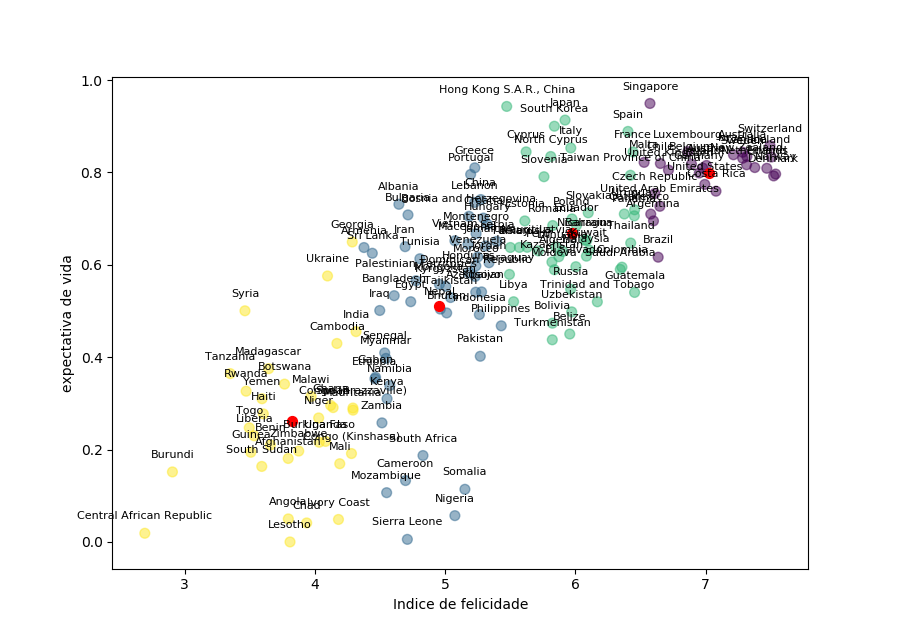

[[7.02251853 0.79946128]
 [4.95060002 0.51192862]
 [5.97249998 0.66812744]
 [3.82191176 0.2611273 ]]


In [30]:
plt.gcf().clear()

from sklearn.cluster import KMeans
from pandas import DataFrame

Data= {'x':Felicidade_2017['Happiness.Score'], 'y': Felicidade_2017['Health..Life.Expectancy.']}

df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#### Colocando os nomes dos paises nos pontos:

In [31]:

i=0
for x,y in zip(df['x'],df['y']):

    label = "{:.2f}".format(y)

    plt.annotate(Felicidade_2017['Country'][i], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 size=8) # horizontal alignment can be left, right or center
    i=i+1
    
plt.ylabel('expectativa de vida')
plt.xlabel('Indice de felicidade')
plt.show()